# ===============================================================

# Calculating $\eta$ for different planets

# ===============================================================

In [77]:
# Let's import the main libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [78]:
# Let's read the CSV file
csv_data = open('etas.csv')

In [79]:
imagette = np.loadtxt(csv_data, delimiter = ' ')

In [80]:
imagette

array([[5.12425154e-05, 1.68465960e-04, 2.37235956e-04, 1.02844778e-04,
        4.81168627e-05, 2.22387211e-05],
       [1.75474645e-04, 7.73693179e-04, 4.10680200e-03, 3.08525392e-03,
        9.64642417e-05, 3.81556984e-05],
       [2.45916174e-03, 1.52861045e-02, 1.66805526e-01, 4.06344573e-01,
        8.33414767e-04, 6.17109071e-05],
       [1.75771644e-03, 1.29182241e-02, 1.65846455e-01, 1.37426760e-01,
        3.32029364e-03, 1.01196192e-04],
       [5.27729806e-04, 3.82951937e-03, 3.49801844e-02, 3.39604057e-02,
        1.25631057e-04, 4.30230457e-05],
       [1.39459357e-04, 6.73149200e-04, 1.59838436e-03, 8.37353005e-04,
        6.91635494e-05, 2.02126833e-05]])

In [81]:
#Let's see where is the maximum
np.where(imagette == np.amax(imagette))

(array([2]), array([3]))

In [82]:
#Let's see where is the minimum
np.where(imagette == np.amin(imagette))

(array([5]), array([5]))

In [83]:
# Multiplying this 2-D array by by the reference flux of one camera for a star of magnitude P = 11(7046.930689671467 e-/s) then for the 24 cameras (24) and then for the integration time (21s):
def flux_pixel_target(a):
    return (a*3551653.0675944197)/24.

In [84]:
f_pix_t = flux_pixel_target(imagette)

In [85]:
f_pix_t

array([[7.58315155e+00, 2.49305268e+01, 3.51074921e+01, 1.52195405e+01,
        7.12060013e+00, 3.29100925e+00],
       [2.59677108e+01, 1.14495406e+02, 6.07747329e+02, 4.56572981e+02,
        1.42753133e+01, 5.64649181e+00],
       [3.63920390e+02, 2.26212250e+03, 2.46848066e+04, 6.01331229e+04,
        1.23333338e+02, 9.13232219e+00],
       [2.60116624e+02, 1.91171043e+03, 2.45428780e+04, 2.03371739e+04,
        4.91355462e+02, 1.49755736e+01],
       [7.80963827e+01, 5.66713510e+02, 5.17656164e+03, 5.02564912e+03,
        1.85915804e+01, 6.36678884e+00],
       [2.06379688e+01, 9.96163509e+01, 2.36537781e+02, 1.23916140e+02,
        1.02352055e+01, 2.99118495e+00]])

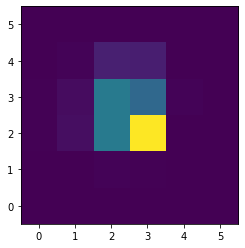

In [86]:
plt.imshow(f_pix_t, origin='lower')

In [87]:
#for i in range(len(f_pix_t)):
#    for j in range(len(f_pix_t[i])):
#        print(f_pix_t[i][j])
#    print()

## Let's compute the $NSR_{n}$

In [88]:
#Let's compute the NSRn of the target
def nsr(sb,sq,sd,f):
    
    for i in range(len(f)):
        for j in range(len(f[i])):
            N[i][j] = np.sqrt(sb**2 + sq**2 + sd**2 + f[i][j])/f[i][j]
            
            
    return N

In [72]:
#NSRn = nsr(45,7.2,50.2,f_pix_t)

In [73]:
#NSRn

In [74]:
#plt.imshow(NSRn, origin = 'lower')

In [75]:
#Let's see where is the maximum
#np.where(NSRn == np.amax(NSRn))

In [76]:
#Let's see where is the minimum
#np.where(NSRn == np.amin(NSRn))

## With the help of Jingwei (and Réza):

In [89]:
N = np.sqrt((45)**2 + (7.2)**2 + (50.2)**2 + f_pix_t)/f_pix_t

In [90]:
N

array([[8.94828413e+00, 2.72693391e+00, 1.93858069e+00, 4.46218730e+00,
        9.52908252e+00, 2.06090459e+01],
       [2.61831038e+00, 5.99495314e-01, 1.18705751e-01, 1.55698313e-01,
        4.75684747e+00, 1.20148802e+01],
       [1.93539443e-01, 3.66112336e-02, 6.93215580e-03, 4.23096132e-03,
        5.57057888e-01, 7.43158283e+00],
       [2.67926574e-01, 4.22008659e-02, 6.95532587e-03, 7.76436323e-03,
        1.45173655e-01, 4.53476078e+00],
       [8.75505325e-01, 1.26798016e-01, 1.90977574e-02, 1.95187703e-02,
        3.65419511e+00, 1.06564287e+01],
       [3.29258765e+00, 6.87949194e-01, 2.93918316e-01, 5.54472160e-01,
        6.63159459e+00, 2.26740744e+01]])

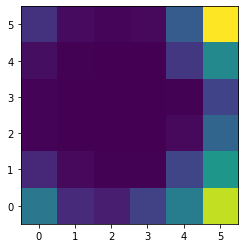

In [91]:
plt.imshow(N, origin='lower')

## Let's sort this matrix with the amazing algorithm I studied

In [92]:
# Function to sort the matrix
def sortMat(data, row, col):
     
    # Number of elements in matrix
    size = row * col
     
    # Loop to sort the matrix
    # using Bubble Sort
    for i in range(0, size):
        for j in range(0, size-1):
             
            # Condition to check
            # if the Adjacent elements
            if ( data[j//col][j % col] >\
                data[(j + 1)//col][(j + 1)% col] ):
                 
                # Swap if previous value is greater
                temp = data[j//col][j % col]
                data[j//col][j % col] =\
                    data[(j + 1)//col][(j + 1)% col]
                data[(j + 1)//col][(j + 1)% col] =\
                                 temp

In [93]:
n = [] 
def printMat(mat, row, col):
    
    # Loop to print the matrix
    for i in range(row):
        for j in range(col):
            n.append(mat[i][j])

In [94]:
# Driver Code
if __name__ == "__main__":
    mat = [[8.94828413e+00, 2.72693391e+00, 1.93858069e+00, 4.46218730e+00,
        9.52908252e+00, 2.06090459e+01],
       [2.61831038e+00, 5.99495314e-01, 1.18705751e-01, 1.55698313e-01,
        4.75684747e+00, 1.20148802e+01],
       [1.93539443e-01, 3.66112336e-02, 6.93215580e-03, 4.23096132e-03,
        5.57057888e-01, 7.43158283e+00],
       [2.67926574e-01, 4.22008659e-02, 6.95532587e-03, 7.76436323e-03,
        1.45173655e-01, 4.53476078e+00],
       [8.75505325e-01, 1.26798016e-01, 1.90977574e-02, 1.95187703e-02,
        3.65419511e+00, 1.06564287e+01],
       [3.29258765e+00, 6.87949194e-01, 2.93918316e-01, 5.54472160e-01,
        6.63159459e+00, 2.26740744e+01]]
    row = len(mat)
    col = len(mat[0])
     
    # Function call to sort
    sortMat(mat, row, col)
     
    # Function call to print the matrix
    printMat(mat, row, col)

In [95]:
n = np.array(n)

In [96]:
n

array([4.23096132e-03, 6.93215580e-03, 6.95532587e-03, 7.76436323e-03,
       1.90977574e-02, 1.95187703e-02, 3.66112336e-02, 4.22008659e-02,
       1.18705751e-01, 1.26798016e-01, 1.45173655e-01, 1.55698313e-01,
       1.93539443e-01, 2.67926574e-01, 2.93918316e-01, 5.54472160e-01,
       5.57057888e-01, 5.99495314e-01, 6.87949194e-01, 8.75505325e-01,
       1.93858069e+00, 2.61831038e+00, 2.72693391e+00, 3.29258765e+00,
       3.65419511e+00, 4.46218730e+00, 4.53476078e+00, 4.75684747e+00,
       6.63159459e+00, 7.43158283e+00, 8.94828413e+00, 9.52908252e+00,
       1.06564287e+01, 1.20148802e+01, 2.06090459e+01, 2.26740744e+01])

In [97]:
n = np.reshape(n, (-1,6))

In [98]:
n

array([[4.23096132e-03, 6.93215580e-03, 6.95532587e-03, 7.76436323e-03,
        1.90977574e-02, 1.95187703e-02],
       [3.66112336e-02, 4.22008659e-02, 1.18705751e-01, 1.26798016e-01,
        1.45173655e-01, 1.55698313e-01],
       [1.93539443e-01, 2.67926574e-01, 2.93918316e-01, 5.54472160e-01,
        5.57057888e-01, 5.99495314e-01],
       [6.87949194e-01, 8.75505325e-01, 1.93858069e+00, 2.61831038e+00,
        2.72693391e+00, 3.29258765e+00],
       [3.65419511e+00, 4.46218730e+00, 4.53476078e+00, 4.75684747e+00,
        6.63159459e+00, 7.43158283e+00],
       [8.94828413e+00, 9.52908252e+00, 1.06564287e+01, 1.20148802e+01,
        2.06090459e+01, 2.26740744e+01]])

In [99]:
NSR_n_sorted = n

In [100]:
NSR_n_sorted

array([[4.23096132e-03, 6.93215580e-03, 6.95532587e-03, 7.76436323e-03,
        1.90977574e-02, 1.95187703e-02],
       [3.66112336e-02, 4.22008659e-02, 1.18705751e-01, 1.26798016e-01,
        1.45173655e-01, 1.55698313e-01],
       [1.93539443e-01, 2.67926574e-01, 2.93918316e-01, 5.54472160e-01,
        5.57057888e-01, 5.99495314e-01],
       [6.87949194e-01, 8.75505325e-01, 1.93858069e+00, 2.61831038e+00,
        2.72693391e+00, 3.29258765e+00],
       [3.65419511e+00, 4.46218730e+00, 4.53476078e+00, 4.75684747e+00,
        6.63159459e+00, 7.43158283e+00],
       [8.94828413e+00, 9.52908252e+00, 1.06564287e+01, 1.20148802e+01,
        2.06090459e+01, 2.26740744e+01]])

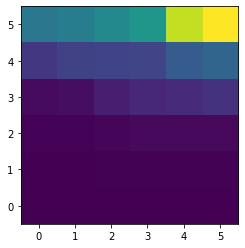

In [101]:
plt.imshow(NSR_n_sorted, origin='lower')

In [102]:
#Let's see where is the maximum
np.where(NSR_n_sorted == np.amax(NSR_n_sorted))

(array([5]), array([5]))

In [103]:
#Let's see where is the minimum
np.where(NSR_n_sorted == np.amin(NSR_n_sorted))

(array([0]), array([0]))

In [104]:
#c = []
#for i in range(len(NSR_n_sorted)):
#    for j in range(len(NSR_n_sorted[i])):
#        c.append(NSR_n_sorted[i][j])

In [105]:
#c

In [106]:
#c = np.array(c)

In [107]:
#c

## Now it is time to calculate the $NSR_{agg}(m)$. Para esto sí me conviene tener las cosas en arreglos de 1-D

In [33]:
#np.where(NSRn == 8.33735052e-04)

In [34]:
#def nsragg(f):
#    d = []
#    e = 0
#    for i in range(0,len(f)):
#        e = e + f[i]
#        d.append(e)
#    return d

In [35]:
#g = nsragg(c)

In [36]:
#g

In [37]:
#plt.plot(g)

In [38]:
#np.where(f_pix_t == 1.44319495e+06)

In [39]:
#np.isclose(f_pix_t, 1.44319495e+06)

## Making f_pix_t a 1-D array 

In [108]:
f_pix_1 = f_pix_t.ravel()

In [109]:
f_pix_1

array([7.58315155e+00, 2.49305268e+01, 3.51074921e+01, 1.52195405e+01,
       7.12060013e+00, 3.29100925e+00, 2.59677108e+01, 1.14495406e+02,
       6.07747329e+02, 4.56572981e+02, 1.42753133e+01, 5.64649181e+00,
       3.63920390e+02, 2.26212250e+03, 2.46848066e+04, 6.01331229e+04,
       1.23333338e+02, 9.13232219e+00, 2.60116624e+02, 1.91171043e+03,
       2.45428780e+04, 2.03371739e+04, 4.91355462e+02, 1.49755736e+01,
       7.80963827e+01, 5.66713510e+02, 5.17656164e+03, 5.02564912e+03,
       1.85915804e+01, 6.36678884e+00, 2.06379688e+01, 9.96163509e+01,
       2.36537781e+02, 1.23916140e+02, 1.02352055e+01, 2.99118495e+00])

In [110]:
f_pix_1_sorted = np.sort(f_pix_1)[::-1]

In [111]:
f_pix_1_sorted

array([6.01331229e+04, 2.46848066e+04, 2.45428780e+04, 2.03371739e+04,
       5.17656164e+03, 5.02564912e+03, 2.26212250e+03, 1.91171043e+03,
       6.07747329e+02, 5.66713510e+02, 4.91355462e+02, 4.56572981e+02,
       3.63920390e+02, 2.60116624e+02, 2.36537781e+02, 1.23916140e+02,
       1.23333338e+02, 1.14495406e+02, 9.96163509e+01, 7.80963827e+01,
       3.51074921e+01, 2.59677108e+01, 2.49305268e+01, 2.06379688e+01,
       1.85915804e+01, 1.52195405e+01, 1.49755736e+01, 1.42753133e+01,
       1.02352055e+01, 9.13232219e+00, 7.58315155e+00, 7.12060013e+00,
       6.36678884e+00, 5.64649181e+00, 3.29100925e+00, 2.99118495e+00])

## Calculating now $NSR_{agg}(m)$

In [112]:
#Let's calculate the numerator of NSR_agg
def numerator_agg(sb,sq,sd,f):
    c = []
    d = 0
    for i in range(0,len(f_pix_1_sorted)):
        d = d + sb**2 + sq*2 + sd**2 + f[i]
        c.append(d)
    return c

In [113]:
n_nsragg = np.array(np.sqrt(numerator_agg(45,7.2,50.2,f_pix_1_sorted)))

In [114]:
n_nsragg

array([254.3473273 , 306.49112466, 350.76933656, 384.62415603,
       397.0790136 , 408.9704539 , 417.22703011, 424.91122024,
       430.94864243, 436.85568089, 442.5987815 , 448.22951082,
       453.68827928, 458.96907454, 464.16439885, 469.18220907,
       474.1463051 , 479.04974068, 483.88811765, 488.65657346,
       493.33537708, 497.96104465, 502.54310513, 507.07953073,
       511.57373082, 516.02552418, 520.43900428, 524.814703  ,
       529.15040177, 533.44982896, 537.71343964, 541.94308167,
       546.13927762, 550.30282304, 554.43297887, 558.53232605])

In [115]:
#Let's calculate the denominator of NSR_agg of the target
def denominator_agg(F):
    a = [F[0]]
    b = F[0]
    for i in range(1,len(F)):
        b = b + F[i]
        a.append(b)
    return a

In [116]:
d_nsragg = np.array(denominator_agg(f_pix_1_sorted))

## Making the division

In [117]:
def nsr_agg(n,d):
    return n/d

In [118]:
NSR_agg = nsr_agg(n_nsragg,d_nsragg)

## Now, we have to obtain $NSR_{1h}$, which is:

# $NSR_{1h} = \frac{10^{6}}{12 \sqrt{N_{T}}} NSR_{agg}(m)$

In [119]:
def nsr1h(z,nsr):
    return z*nsr

In [130]:
NSR1h = nsr1h(10**6/(12*np.sqrt(24)),NSR_agg)

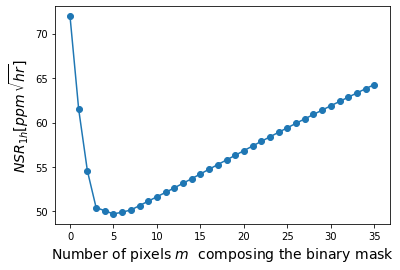

In [131]:
plt.plot(NSR1h, 'o-')
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
#plt.savefig('binary_mask.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [132]:
min(NSR1h)

49.726369824211226

In [133]:
np.where(NSR1h == np.min(NSR1h))

(array([5]),)

In [134]:
def etat(td,ntr,dbeb):
    term1 = (1)*np.sqrt(td*ntr)
    term2 = dbeb/min(NSR1h)
    return term1*term2

In [135]:
td = 13 # hours
ntr = 3
#dbeb = 500000
dbeb = 84 #ppm

In [136]:
print('The statistical significance is:', etat(td,ntr,dbeb))

The statistical significance of the target mask because of a false positive is: 10.549328931911157


In [127]:
etat_earth = etat(13,3,84)

In [128]:
td = 29.6 #hours
ntr = 1 
dbeb = 10100 #ppm

In [129]:
print(etat(td,ntr,dbeb))

552.5231486789195
